In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [34]:
data=pd.DataFrame(columns=['Pictures','histogram','label'])

In [35]:
face_cascade = cv2.CascadeClassifier('Haarcascades\haarcascade_frontalface_default.xml')

In [36]:
imgpath = 'Images\sample11.jpg'

In [37]:
img = cv2.imread(imgpath)

In [38]:
img=cv2.resize(img,(800,600))

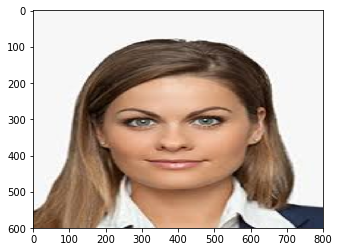

In [39]:
plt.imshow(img[:,:,::-1])
plt.show()

In [41]:
print("enter label : ")
lab=int(input(),10)

enter label : 
987


In [42]:
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [43]:
faces = face_cascade.detectMultiScale(img1,scaleFactor = 1.05, minNeighbors=10)

In [44]:
def LBP(a):
    m=a.shape[0]
    n=a.shape[1]
    lbp=np.array([[0 for i in range(n-2)] for j in range(m-2)])
    for i in range(m-2):
        for j in range(n-2):
            pat=''
            ther=a[i+1][j+1]
            if ther>a[i][j]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+1]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i+1][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i+2][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i+1][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+1]:
                pat+='0'
            else:
                pat+='1'
            lbp[i][j]=int(pat,2)
    return lbp

In [45]:
def HOG(img):
    grid_x,grid_y=9,9
    m=img.shape[0]//grid_x
    n=img.shape[1]//grid_y
    hist=[]
    for i in range(grid_x-1):
        for j in range(grid_y-1):
            temp=img[j*m:(j+1)*m,i*n:(i+1)*n]
            x=np.reshape(temp,[1,m*n])
            #plt.hist(x[0],bins=256)
            hist1, bin_edges = np.histogram(x,bins=256)
            hist.append(hist1)
    hist=np.array(hist)
    return hist

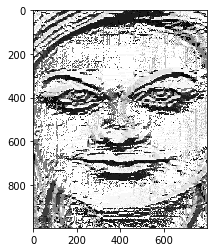

In [46]:
for (x,y,w,h) in faces:
    crop_img = img1[y:y+h, x:x+w]
    crop_img=cv2.resize(crop_img,(800,1000))
    lbp_img = LBP(crop_img)
    histogram=HOG(lbp_img)
    df1=pd.DataFrame({'Pictures':[lbp_img],'histogram':[histogram],'label':[lab]})
    data=data.append(df1)
    plot=plt.imshow(lbp_img,cmap='gray')
    plt.show()
    

In [48]:
data

,Pictures,histogram,label
0,"[[193, 193, 193, 193, 193, 193, 193, 193, 255,...","[[37, 0, 0, 0, 0, 0, 0, 0, 66, 0, 0, 0, 0, 0, ...",987


In [49]:
rec_img = cv2.imread(imgpath)

In [50]:
gray_img=cv2.resize(rec_img,(800,600))

In [51]:
gray_img = cv2.cvtColor(gray_img,cv2.COLOR_BGR2GRAY)

In [53]:
faces = face_cascade.detectMultiScale(gray_img,scaleFactor = 1.05, minNeighbors=10)

In [54]:
for (x,y,w,h) in faces:
    crop_img = img1[y:y+h, x:x+w]
    crop_img=cv2.resize(crop_img,(800,1000))
    lbp_img = LBP(crop_img)
    histogram=HOG(lbp_img)
    hist=np.array(data['histogram'])
    labels=np.array(data['label'])
    dist=0
    min1=9999999999999
    k=0
    for his in hist:
        for i,j in zip(histogram,his):
            for m,n in zip(i,j):
                dist+=abs(m-n)
        if min1>dist:
            label=labels[k]
        k+=1
    print(label)

987
